In [172]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os

In [173]:
wholesale_customer = pd.read_csv('Wholesale+Customers+Data.csv')

In [174]:
wholesale_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [175]:
wholesale_customer.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [176]:


wholesale_customer.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [177]:
wholesale_customer_drop = copy.deepcopy(wholesale_customer)
wholesale_customer_drop

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [178]:

del wholesale_customer_drop['Buyer/Spender']

In [179]:

wholesale_customer_drop

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125




Region Count

In [180]:
wholesale_customer_drop['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64


Chnnel Count

In [181]:
wholesale_customer_drop['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

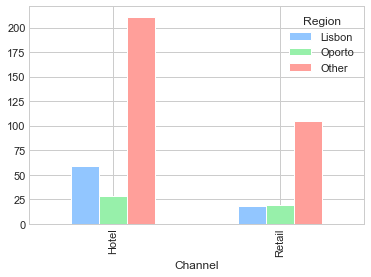

Region   Lisbon  Oporto  Other
Channel                       
Hotel        59      28    211
Retail       18      19    105


In [182]:
def categorical_multi(i,j):
    pd.crosstab(wholesale_customer_drop[i],wholesale_customer_drop[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(wholesale_customer_drop[i],wholesale_customer_drop[j]))

categorical_multi(i='Channel',j='Region')

We are going to start exploring our data with the Univariate analysis (each feature individually), before carrying the Bivariate analysis and compare pairs of features to find correlation between them.

In [183]:
print('Descriptive Statastics of our Data:')
wholesale_customer_drop.describe().T

Descriptive Statastics of our Data:


,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [184]:
print('Descriptive Statastics of our Data including Channel & Retail:')
wholesale_customer_drop.describe(include='all').T

Descriptive Statastics of our Data including Channel & Retail:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [185]:

import warnings
warnings.filterwarnings('ignore')

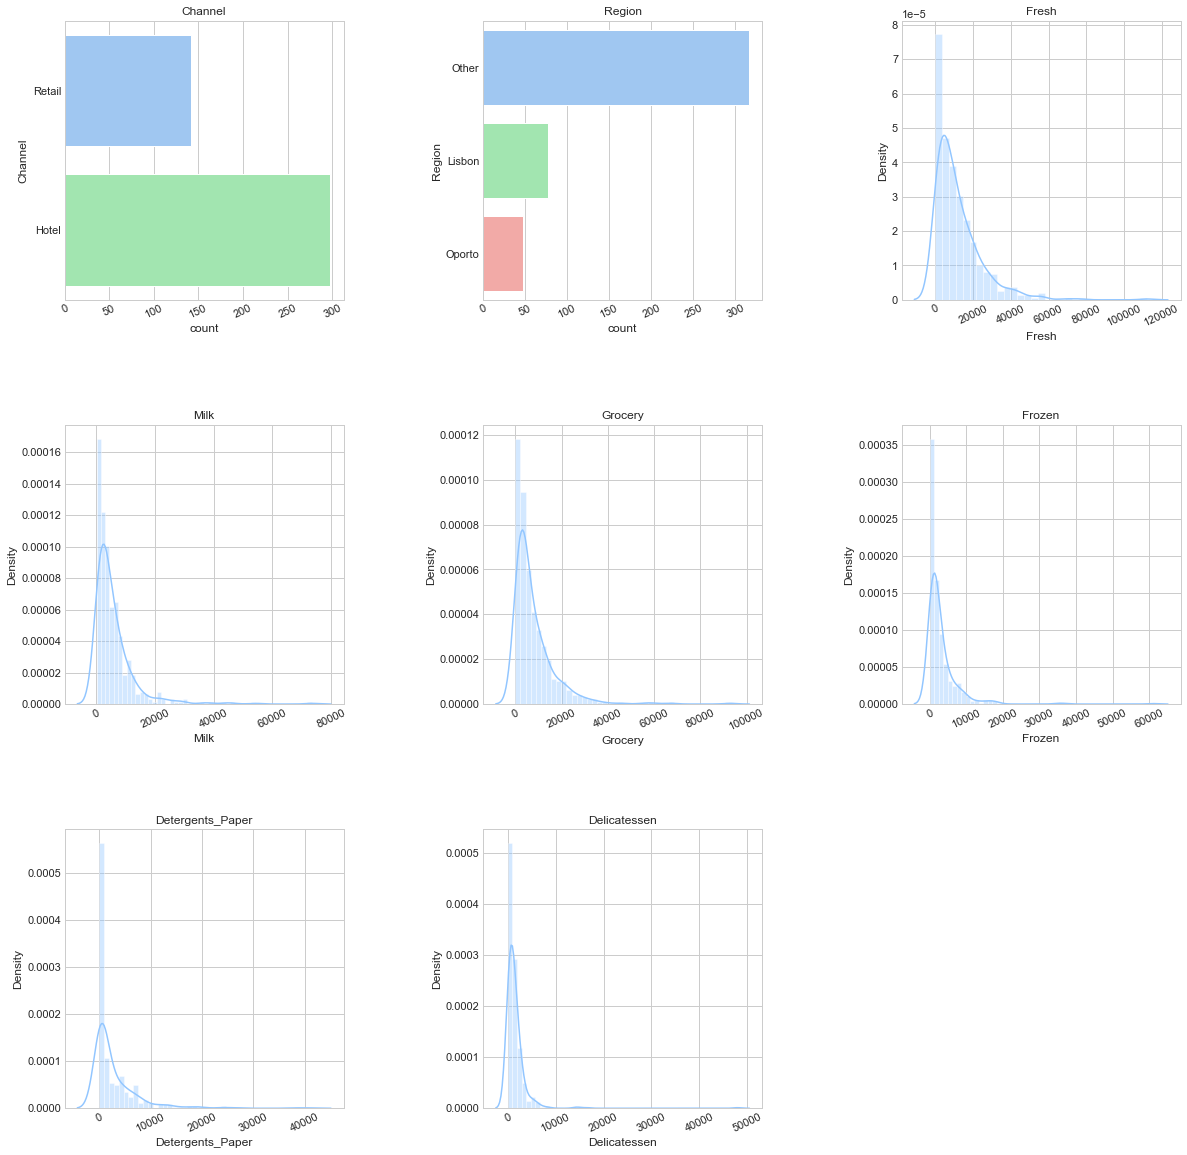

In [186]:


def plot_distribution(df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=df)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(df[column])
            plt.xticks(rotation=25)
    
plot_distribution(wholesale_customer_drop, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

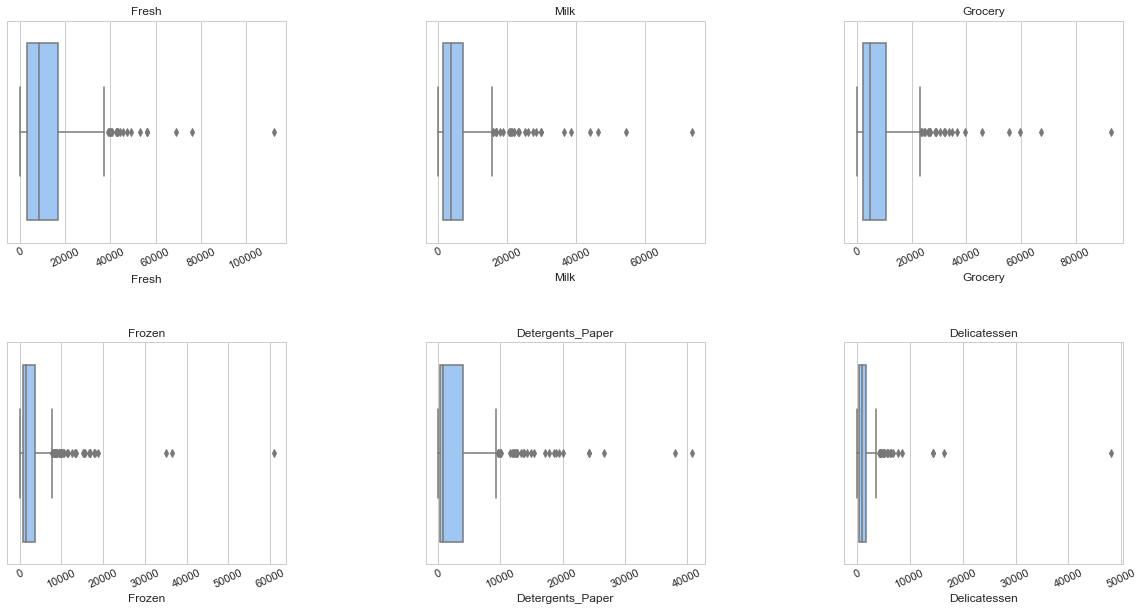

In [187]:
# Let’s remove the categorical columns:
products = wholesale_customer_drop[wholesale_customer_drop.columns[+2:wholesale_customer_drop.columns.size]]

#Let’s plot the distribution of each feature
def plot_distribution(df2, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df2.shape[1]) / cols)
    for i, column in enumerate(df2.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        g = sns.boxplot(df2[column])
        plt.xticks(rotation=25)
    
plot_distribution(products, cols=3, width=20, height=10, hspace=0.45, wspace=0.5)


Bivariate


In [188]:


##Let's use Seaborn pairplot to have a first look at how our data is interracting.

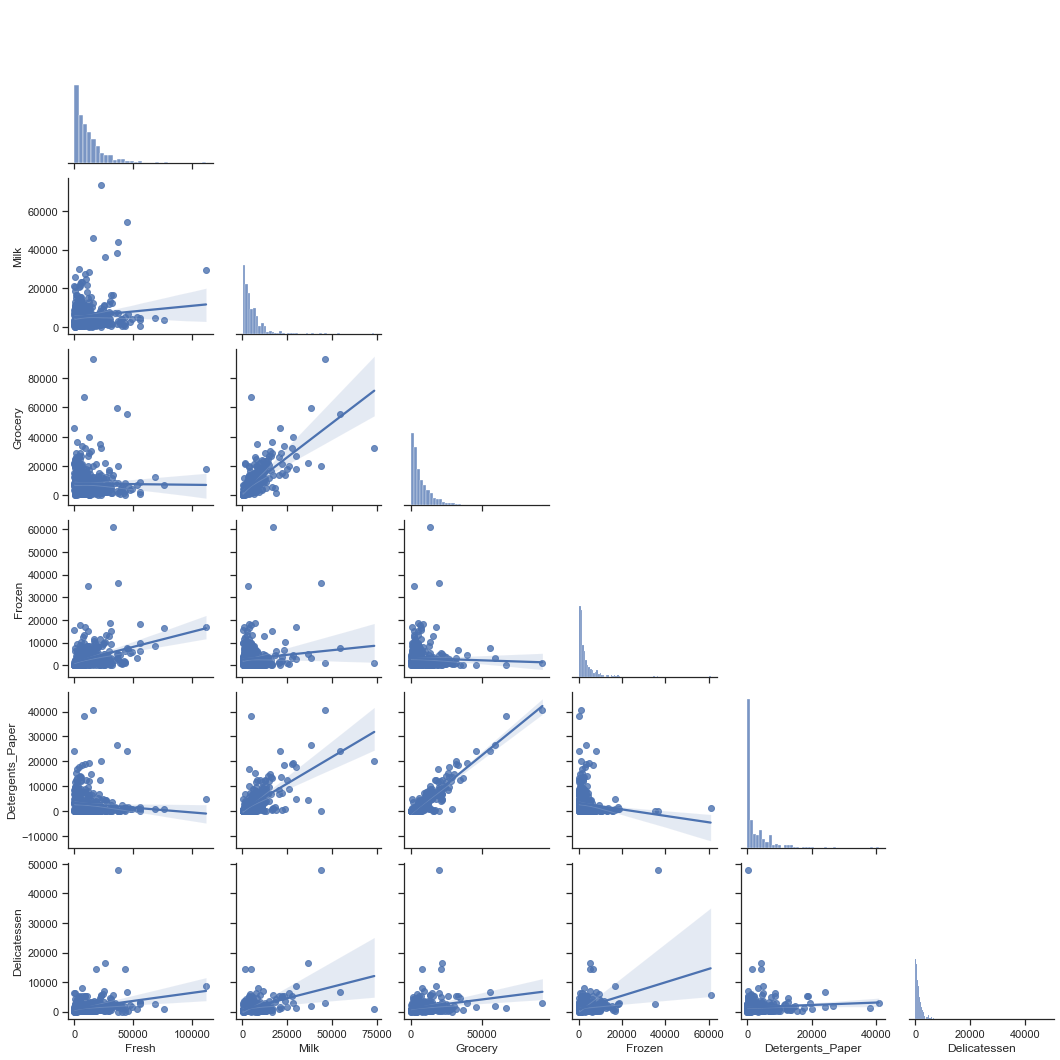

In [189]:


sns.set(style="ticks")
g = sns.pairplot(products,corner=True,kind='reg')
g.fig.set_size_inches(15,15)


From the pairplot above, the correlation between the "detergents and paper products" and the "grocery products" seems to be pretty strong, meaning that consumers would often spend money on these two types of product. Let's look at the Pearson correlation coefficient to confirm this:

Text(0.5, 1.0, 'Pearson correlation')

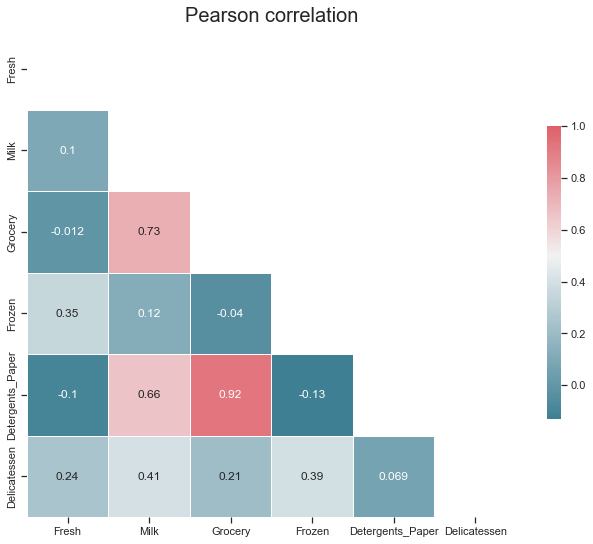

In [190]:




# Compute the correlation matrix
corr = products.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)

plt.title("Pearson correlation", fontsize =20)


There is strong correlation (0.92) between the "detergents and paper products" and the "grocery products"


## Problem 1

1.1. Use methods of descriptive statistics to summarize data.
Which Region and which Channel seems to spend more?
Which Region and which Channel seems to spend less?

In [191]:
print('Descriptive Statastics of our Data:')
wholesale_customer_drop.describe().T

Descriptive Statastics of our Data:


,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [192]:
print('Descriptive Statastics of our Data including Channel & Retail:')
wholesale_customer_drop.describe(include='all').T

Descriptive Statastics of our Data including Channel & Retail:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [193]:
#created Summation of all the products into a new column - Spending
# there are many ways to create a new column, I have selected the below approach
wholesale_customer_spending = copy.deepcopy(wholesale_customer_drop)
wholesale_customer_spending['Spending'] =wholesale_customer_drop['Fresh']+wholesale_customer_drop['Milk']+wholesale_customer_drop['Grocery']+wholesale_customer_drop['Frozen']+wholesale_customer_drop['Detergents_Paper']+wholesale_customer_drop['Delicatessen']
wholesale_customer_spending

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [194]:
regiondf = wholesale_customer_spending.groupby('Region')['Spending'].sum()
print(regiondf)
print()
channeldf = wholesale_customer_spending.groupby('Channel')['Spending'].sum()
print(channeldf)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64

Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64


Highest spend in the Region is from Others and lowest spend in the region is from Oporto

Highest spend in the Channel is from Hotel and lowest spend in the Channel is from Retail.

In [195]:
wholesale_customer_drop_df_1 = copy.deepcopy(wholesale_customer)
del wholesale_customer_drop_df_1['Buyer/Spender']

In [196]:


data1 = wholesale_customer_drop_df_1.drop(columns=['Region'])
mean1 = data1.groupby('Channel').mean()
mean1.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
Retail,8904.32,10716.50,16322.85,1652.61,7269.51,1753.44


In Channel "Hotel" Average Highest Spending in Fresh items and Lowest Spending in Detergents_Paper.

In Channel "Retail" Average Highest Spending in Grocery items and Lowest Spending in Frozen items.

In [197]:
data2 = wholesale_customer_drop_df_1.drop(columns=['Channel'])
mean2 = data2.groupby('Region').mean()
mean2.round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,11101.73,5486.42,7403.08,3000.34,2651.12,1354.9
Oporto,9887.68,5088.17,9218.60,4045.36,3687.47,1159.7
Other,12533.47,5977.09,7896.36,2944.59,2817.75,1620.6


# 1.2. There are 6 different varieties of items are considered.
Do all varieties show similar behaviour across Region and Channel?



See Behaviour in all items across Channel and Region use Bar Plot. Here we see that they are different in Channel and Region.

Text(0.5, 1.0, 'Item - Fresh')

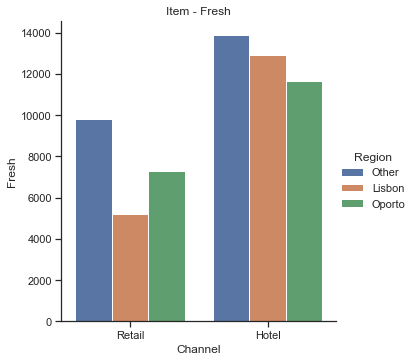

In [198]:


sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Fresh')

In [199]:
print('Descriptive Statastics of our Data:')
wholesale_customer_drop.describe().T

Descriptive Statastics of our Data:


,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


Text(0.5, 1.0, 'Item - Fresh')

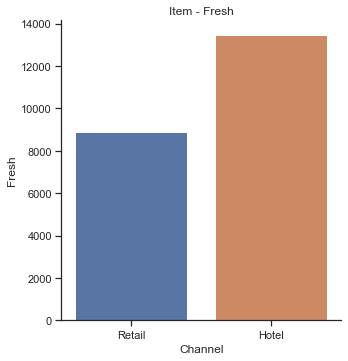

In [200]:
sns.catplot(x="Channel", y="Fresh", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Fresh')

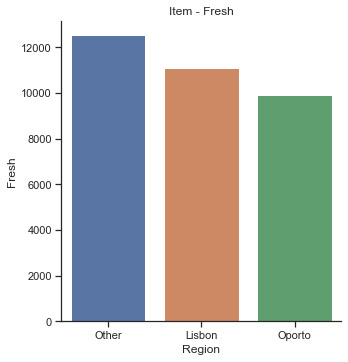

In [201]:

sns.catplot(x="Region", y="Fresh", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Milk')

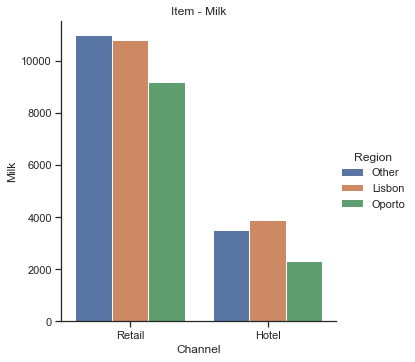

In [202]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Milk", hue ="Region", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Milk')

Text(0.5, 1.0, 'Item - Milk')

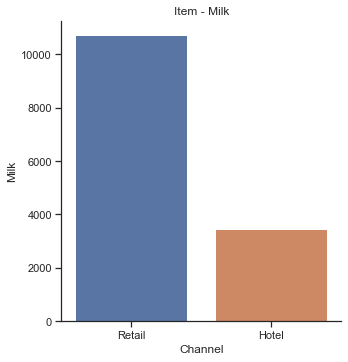

In [203]:
sns.catplot(x="Channel", y="Milk", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Milk')

Text(0.5, 1.0, 'Item - Milk')

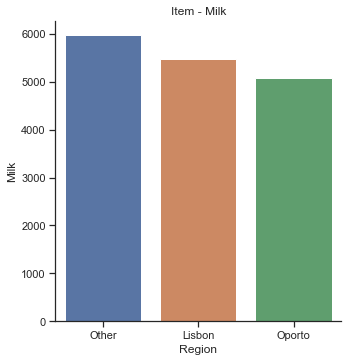

In [204]:
sns.catplot(x="Region", y="Milk", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Milk')

Observation

Text(0.5, 1.0, 'Item - Grocery')

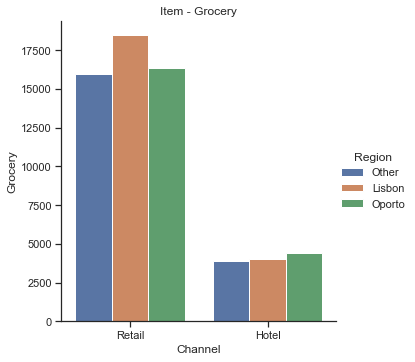

In [205]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Grocery", hue ="Region", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Grocery')

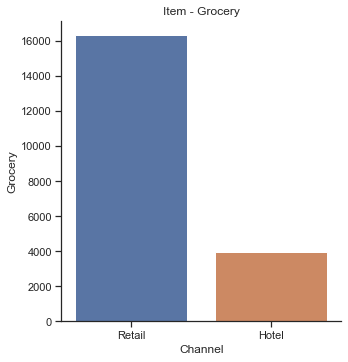

In [206]:
sns.catplot(x="Channel", y="Grocery", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Grocery')

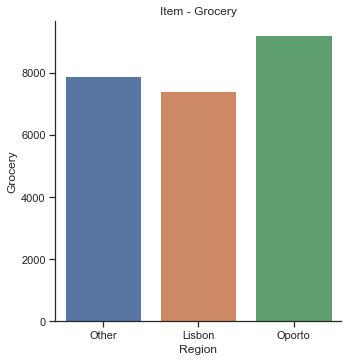

In [207]:
sns.catplot(x="Region", y="Grocery", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Grocery')

Text(0.5, 1.0, 'Item - Frozen')

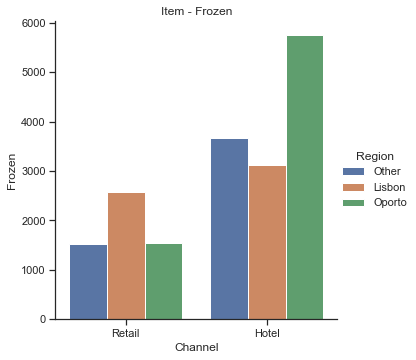

In [208]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Frozen", hue ="Region", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Frozen')

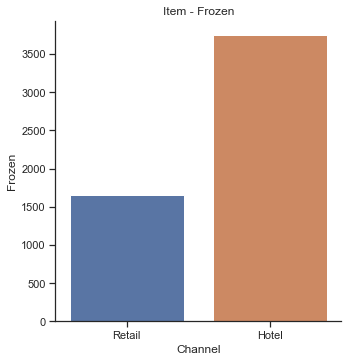

In [209]:
sns.catplot(x="Channel", y="Frozen", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Frozen')

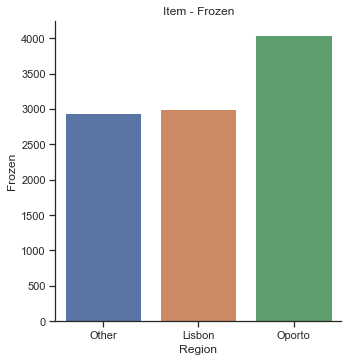

In [210]:
sns.catplot(x="Region", y="Frozen", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Frozen')

Text(0.5, 1.0, 'Item - Detergents_Paper')

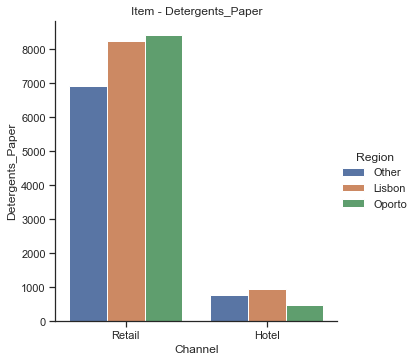

In [211]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Detergents_Paper", hue ="Region", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Detergents_Paper')

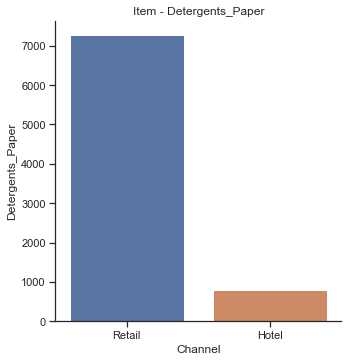

In [212]:
sns.catplot(x="Channel", y="Detergents_Paper", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Item - Detergents_Paper')

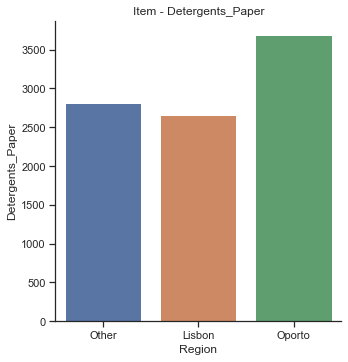

In [213]:
sns.catplot(x="Region", y="Detergents_Paper", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Detergents_Paper')

Text(0.5, 1.0, 'Delicatessen')

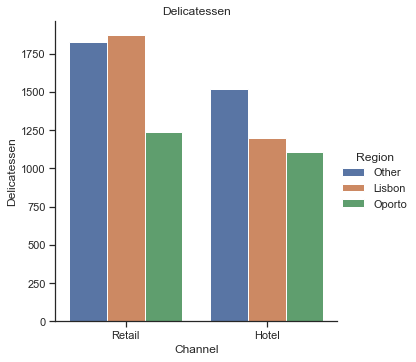

In [214]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="Channel", y="Delicatessen", hue ="Region", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Delicatessen')

Text(0.5, 1.0, 'Item - Delicatessen')

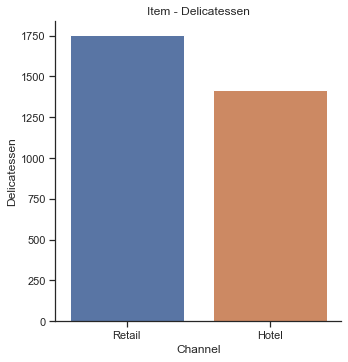

In [215]:
sns.catplot(x="Channel", y="Delicatessen", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Delicatessen')

Text(0.5, 1.0, 'Item - Delicatessen')

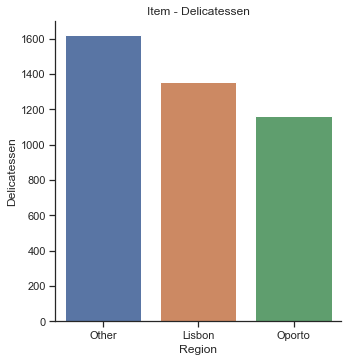

In [216]:
sns.catplot(x="Region", y="Delicatessen", kind="bar", ci=None, data=wholesale_customer_drop)
plt.title('Item - Delicatessen')

# 1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [217]:
standard_deviation_items = products.std() #use standard deviation to check the measure of variabilty
standard_deviation_items.round(2)

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
dtype: float64

Based on coeffiecent of Variation

In [ ]:

cv_fresh = np.std(products['Fresh']) / np.mean(products['Fresh'])
cv_fresh

In [301]:
cv_milk = np.std(products['Milk']) / np.mean(products['Milk'])
cv_milk

1.2718508307424503

In [302]:
cv_grocery = np.std(products['Grocery']) / np.mean(products['Grocery'])
cv_grocery

1.193815447749267

In [303]:


cv_frozen = np.std(products['Frozen']) / np.mean(products['Frozen'])
cv_frozen

1.5785355298607762

In [304]:
cv_detergents_paper = np.std(products['Detergents_Paper']) / np.mean(products['Detergents_Paper'])
cv_detergents_paper

1.6527657881041729

In [305]:
cv_delicatessen = np.std(products['Delicatessen']) / np.mean(products['Delicatessen'])
cv_delicatessen

1.8473041039189306

In [306]:
from scipy.stats import variation
print(variation(products, axis = 0))

[1.05271961 1.27185083 1.19381545 1.57853553 1.65276579 1.8473041 ]


Fresh” item have lowest coefficient of Variation So that is consistent.

“Delicatessen” item have highest coefficient of Variation, So that is Inconsistent.

In [307]:
variance_items = products.var()
variance_items

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

#InfrencesFreshitemhavehighestStandarddeviationSothatisInconsistent.DelicatessenitemhavesmallestStandarddeviation,Sothat
isconsistent

In [308]:
products.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


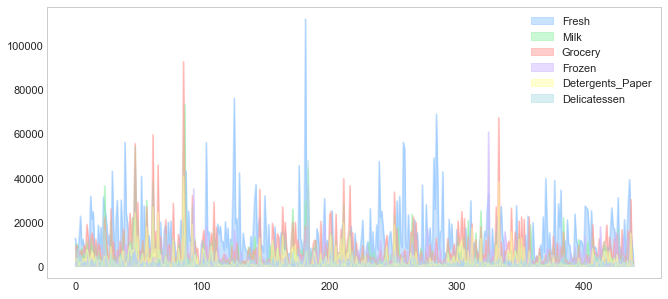

In [309]:
pylab.style.use('seaborn-pastel')
products.plot.area(stacked=False,figsize=(11,5))
pylab.grid(); pylab.show()

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

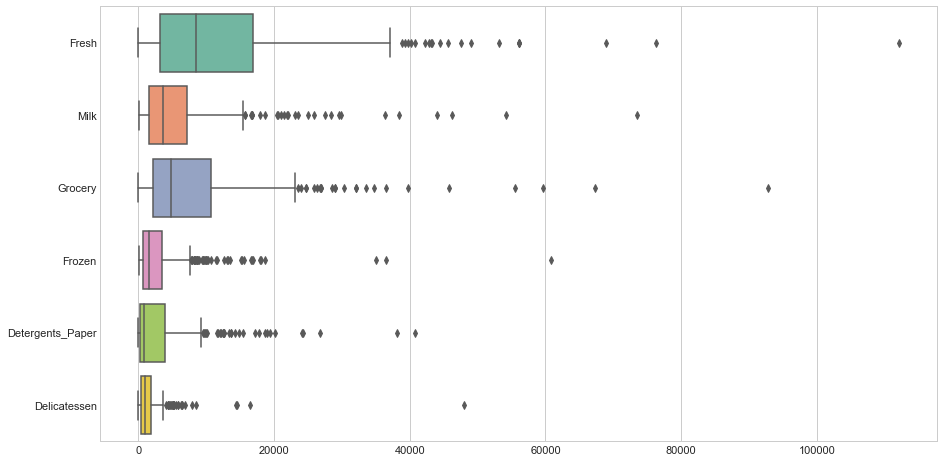

In [310]:
plt.figure(figsize=(15,8))
sns.boxplot(data=products, orient="h", palette="Set2")

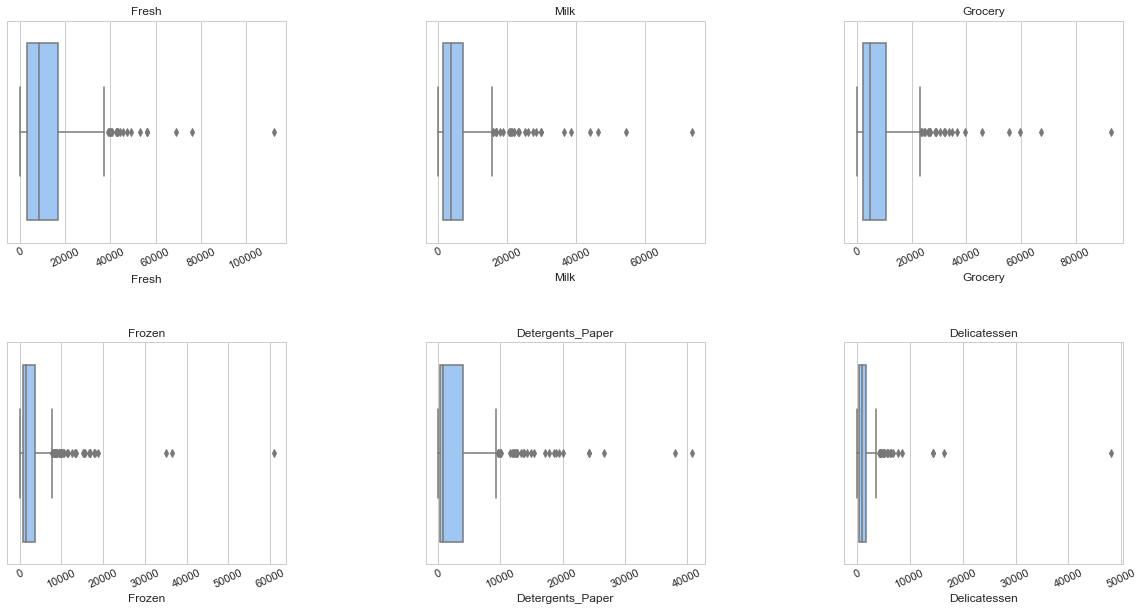

In [311]:
def plot_distribution(items, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(items.shape[1]) / cols)
    for i, column in enumerate(items.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        g = sns.boxplot(items[column])
        plt.xticks(rotation=25)
    
plot_distribution(products, cols=3, width=20, height=10, hspace=0.45, wspace=0.5)

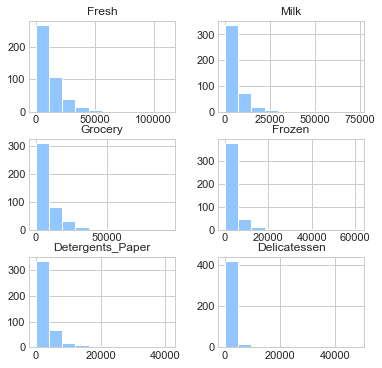

In [312]:
# visual analysis via histogram
products.hist(figsize=(6,6));

In [313]:
def out_std(s, nstd=3.0, return_thresholds=False):
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in s]

def out_iqr(s, k=1.5, return_thresholds=False):
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

In [314]:

# outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask = out_std(products['Fresh'], nstd=3.0)
# first 10 elements
outlier_mask[:10]

[False, False, False, False, False, False, False, False, False, False]

In [315]:
products['Fresh'][outlier_mask]

39      56159
103     56082
125     76237
181    112151
258     56083
259     53205
284     68951
Name: Fresh, dtype: int64

In [316]:
#Visualize the outliers in the context of the Fresh's distribution.

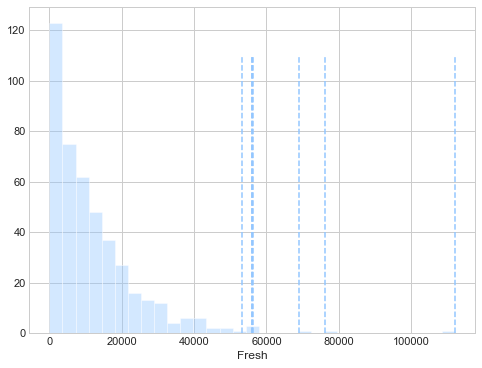

In [317]:



plt.figure(figsize=(8,6))
sns.distplot(products['Fresh'], kde=False);
plt.vlines(products['Fresh'][outlier_mask], ymin=0, ymax=110, linestyles='dashed');

In [318]:
# outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask_Milk = out_std(products['Milk'], nstd=3.0)
# first 10 elements
outlier_mask_Milk[:10]

[False, False, False, False, False, False, False, False, False, False]

In [319]:


products['Milk'][outlier_mask_Milk]

23     36423
47     54259
56     29892
61     38369
85     46197
86     73498
181    29627
183    43950
211    28326
Name: Milk, dtype: int64

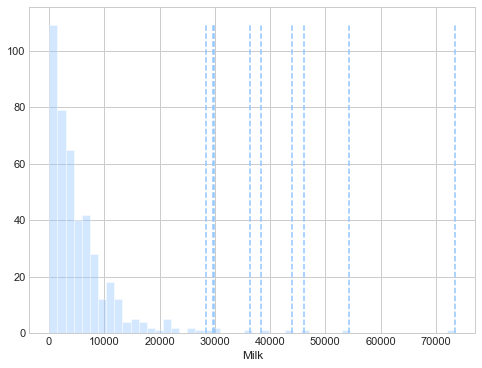

In [320]:
plt.figure(figsize=(8,6))
sns.distplot(products['Milk'], kde=False);
plt.vlines(products['Milk'][outlier_mask_Milk], ymin=0, ymax=110, linestyles='dashed');

In [321]:

# outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask_Frozen = out_std(products['Frozen'], nstd=3.0)
# first 10 elements
outlier_mask_Frozen[:10]

[False, False, False, False, False, False, False, False, False, False]

In [322]:
products['Frozen'][outlier_mask_Frozen]

93     35009
103    18028
183    36534
196    18711
325    60869
413    17866
Name: Frozen, dtype: int64

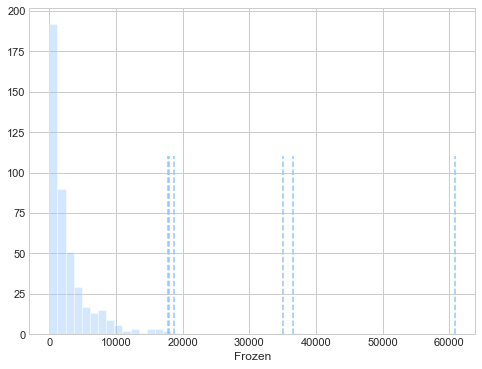

In [323]:
plt.figure(figsize=(8,6))
sns.distplot(products['Frozen'], kde=False);
plt.vlines(products['Frozen'][outlier_mask_Frozen], ymin=0, ymax=110, linestyles='dashed');

In [242]:
# outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask_Grocery= out_std(products['Grocery'], nstd=3.0)
# first 10 elements
outlier_mask_Grocery[:10]

[False, False, False, False, False, False, False, False, False, False]

In [243]:
products['Grocery'][outlier_mask_Grocery]

47     55571
61     59598
65     45828
85     92780
211    39694
216    36486
333    67298
Name: Grocery, dtype: int64

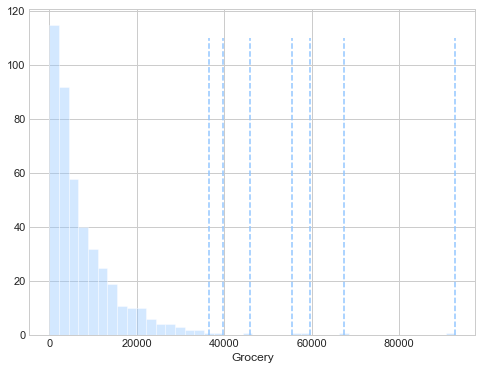

In [244]:
plt.figure(figsize=(8,6))
sns.distplot(products['Grocery'], kde=False);
plt.vlines(products['Grocery'][outlier_mask_Grocery], ymin=0, ymax=110, linestyles='dashed');


In [245]:
# outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask_Detergents_Paper= out_std(products['Detergents_Paper'], nstd=3.0)
# first 10 elements
outlier_mask_Detergents_Paper[:10]

[False, False, False, False, False, False, False, False, False, False]

In [246]:
products['Detergents_Paper'][outlier_mask_Detergents_Paper]

47     24171
56     17740
61     26701
65     24231
85     40827
86     20070
92     18906
211    19410
251    18594
333    38102
Name: Detergents_Paper, dtype: int64

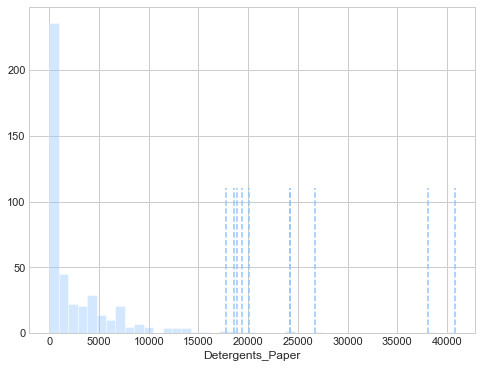

In [247]:


plt.figure(figsize=(8,6))
sns.distplot(products['Detergents_Paper'], kde=False);
plt.vlines(products['Detergents_Paper'][outlier_mask_Detergents_Paper], ymin=0, ymax=110, linestyles='dashed');

In [248]:
# outlier_mask is a boolean list identifies the indices of the outliers
outlier_mask_Delicatessen = out_std(products['Delicatessen'], nstd=3.0)
# first 10 elements
outlier_mask_Delicatessen[:10]

[False, False, False, False, False, False, False, False, False, False]

In [249]:
products['Delicatessen'][outlier_mask_Delicatessen]

23     16523
71     14472
87     14351
183    47943
Name: Delicatessen, dtype: int64

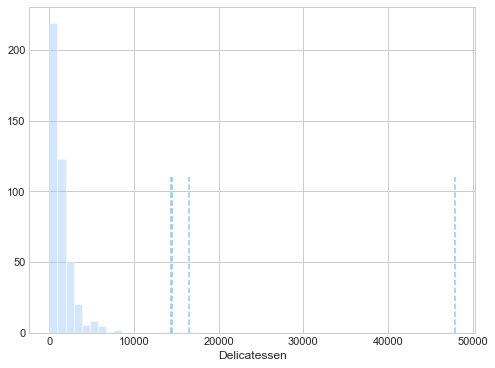

In [250]:
plt.figure(figsize=(8,6))
sns.distplot(products['Delicatessen'], kde=False);
plt.vlines(products['Delicatessen'][outlier_mask_Delicatessen], ymin=0, ymax=110, linestyles='dashed');


Compare Standard Deviation and IQR

In [251]:
# For comparison, make one array each using standard deviations of 2.0, 3.0 and 4.0.
std2 = products.apply(out_std, nstd=2.0)
std3 = products.apply(out_std, nstd=3.0)
std4 = products.apply(out_std, nstd=4.0)

# For comparison, make one array each at varying values of k.
iqr1 = products.apply(out_iqr, k=1.5)
iqr2 = products.apply(out_iqr, k=2.0)
iqr3 = products.apply(out_iqr, k=3.0)

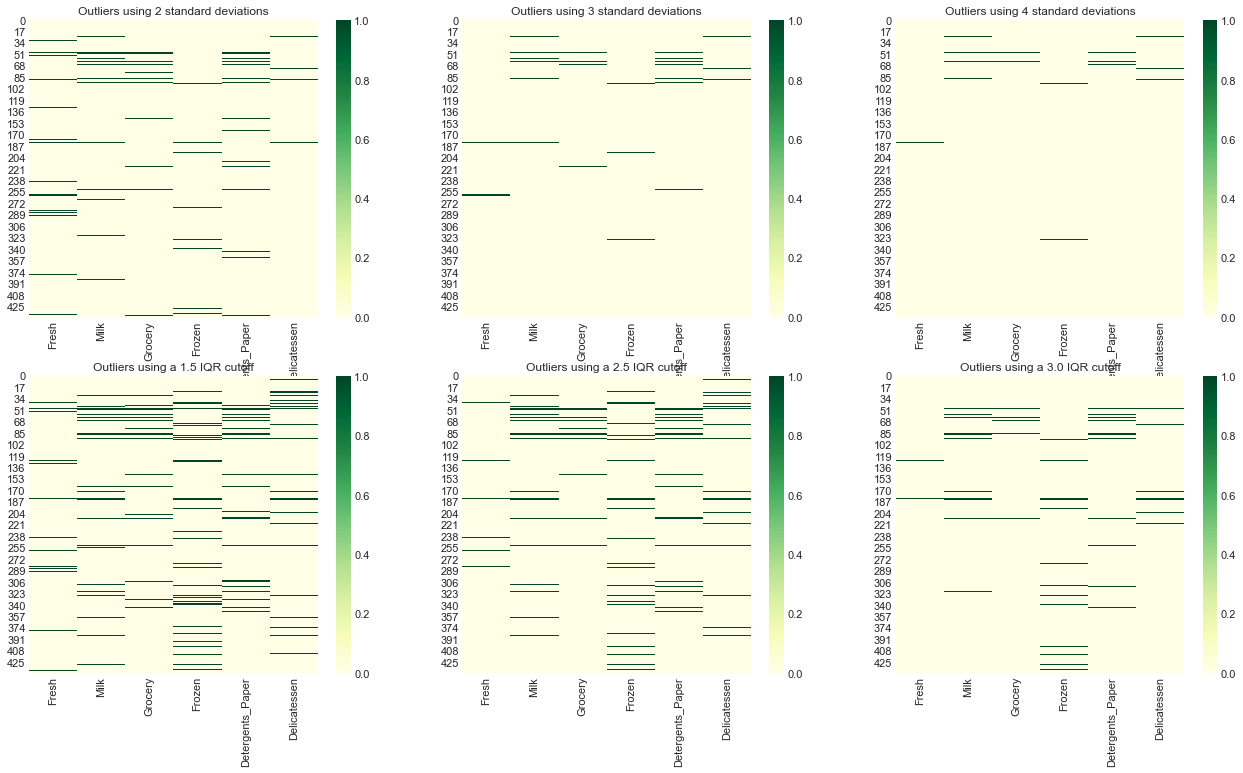

In [252]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(22, 12));
ax1.set_title('Outliers using 2 standard deviations');
ax2.set_title('Outliers using 3 standard deviations');
ax3.set_title('Outliers using 4 standard deviations');
ax4.set_title('Outliers using a 1.5 IQR cutoff');
ax5.set_title('Outliers using a 2.5 IQR cutoff');
ax6.set_title('Outliers using a 3.0 IQR cutoff');

sns.heatmap(std2, cmap='YlGn', ax=ax1);
sns.heatmap(std3, cmap='YlGn', ax=ax2);
sns.heatmap(std4, cmap='YlGn', ax=ax3);
sns.heatmap(iqr1, cmap='YlGn', ax=ax4);
sns.heatmap(iqr2, cmap='YlGn', ax=ax5);
sns.heatmap(iqr3, cmap='YlGn', ax=ax6);

plt.savefig('outliers.png')
plt.show()


In [253]:
def plot_cutoff(dataframe, col, nstd=2.0, color='red'):
    lower, upper = out_std(dataframe[col], nstd=nstd, return_thresholds=True)
    plt.axvspan(min(dataframe[col][dataframe[col] < lower], default=dataframe[col].min()), lower, alpha=0.2, color=color);
    plt.axvspan(upper, max(dataframe[col][dataframe[col] > upper], default=dataframe[col].max()), alpha=0.2, color=color);

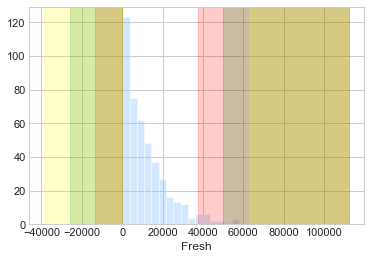

In [254]:
column = 'Fresh'
sns.distplot(products[column], kde=False)
plot_cutoff(products, column, nstd=2.0, color='red');
plot_cutoff(products, column, nstd=3.0, color='green');
plot_cutoff(products, column, nstd=4.0, color='yellow');

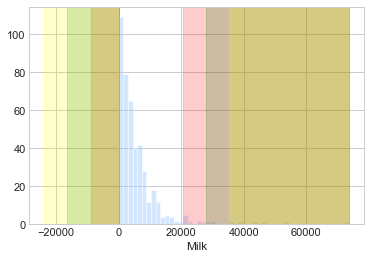

In [255]:
column = 'Milk'
sns.distplot(products[column], kde=False)
plot_cutoff(products, column, nstd=2.0, color='red');
plot_cutoff(products, column, nstd=3.0, color='green');
plot_cutoff(products, column, nstd=4.0, color='yellow');

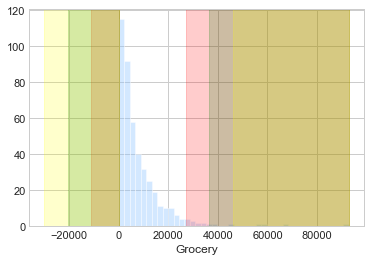

In [256]:

column = 'Grocery'
sns.distplot(products[column], kde=False)
plot_cutoff(products, column, nstd=2.0, color='red');
plot_cutoff(products, column, nstd=3.0, color='green');
plot_cutoff(products, column, nstd=4.0, color='yellow');

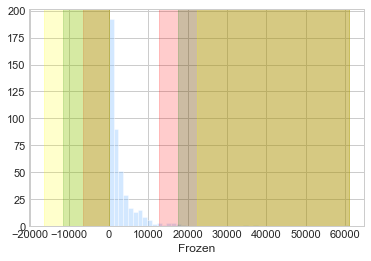

In [257]:
column = 'Frozen'
sns.distplot(products[column], kde=False)
plot_cutoff(products, column, nstd=2.0, color='red');
plot_cutoff(products, column, nstd=3.0, color='green');
plot_cutoff(products, column, nstd=4.0, color='yellow');

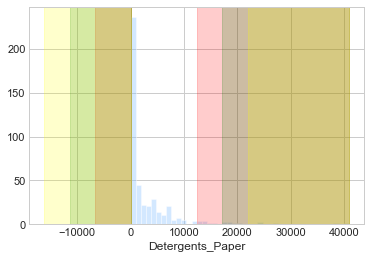

In [258]:
column = 'Detergents_Paper'
sns.distplot(products[column], kde=False)
plot_cutoff(products, column, nstd=2.0, color='red');
plot_cutoff(products, column, nstd=3.0, color='green');
plot_cutoff(products, column, nstd=4.0, color='yellow');

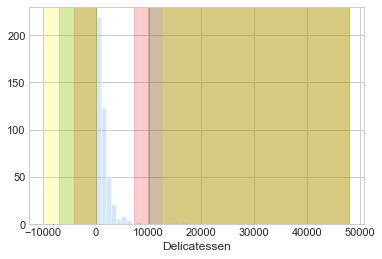

In [259]:
column = 'Delicatessen'
sns.distplot(products[column], kde=False)
plot_cutoff(products, column, nstd=2.0, color='red');
plot_cutoff(products, column, nstd=3.0, color='green');
plot_cutoff(products, column, nstd=4.0, color='yellow');

In [260]:
cols_prd = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

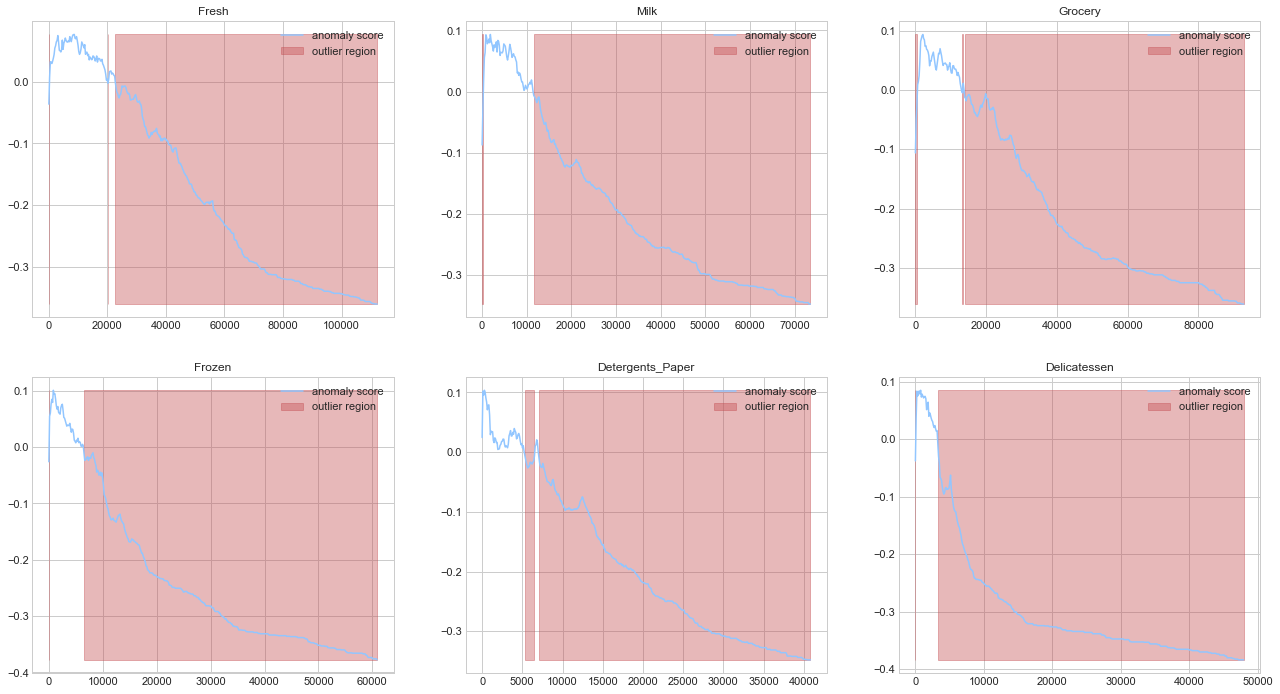

In [261]:
from sklearn.ensemble import IsolationForest
fig, axs = plt.subplots(2, 3, figsize=(22, 12), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols_prd):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(products[column].values.reshape(-1,1))

    xx = np.linspace(products[column].min(), products[column].max(), len(products)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier_iso_forest = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier_iso_forest==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)


----------------

In [262]:




wholesale_customer_drop.groupby(['Channel', 'Region']).agg(['mean', 'std']).round(1)

Fresh              Milk           Grocery           Frozen  \
                   mean      std     mean      std     mean      std    mean   
Channel Region                                                                 
Hotel   Lisbon  12902.3  12342.0   3870.2   4298.3   4026.1   3629.6  3127.3   
        Oporto  11650.5   8969.4   2304.2   2968.6   4395.5   3048.3  5745.0   
        Other   13878.1  14746.6   3487.0   4508.5   3886.7   3593.5  3656.9   
Retail  Lisbon   5200.0   5415.5  10784.0   6609.2  18471.9  10414.7  2584.1   
        Oporto   7289.8   6867.9   9190.8   6611.4  16326.3  14035.5  1540.6   
        Other    9831.5   9635.4  10981.0  10574.8  15953.8  12298.9  1513.2   

                        Detergents_Paper         Delicatessen          
                    std             mean     std         mean     std  
Channel Region                                                         
Hotel   Lisbon   3276.5            950.5  1305.9       1197.2  1219.9  
        Oporto  11454.5            482.7   425.3       1105.9  1056.8  
        Other    4956.6            786.7  1100.0       1518.3  3663.2  
Retail  Lisbon   2424.8           8225.3  5515.9       1871.9  1626.5  
        Oporto   2473.3           8410.3  8286.7       1239.0  1065.4  
        Other    1504.5           6899.2  6022.1       1826.2  2119.1

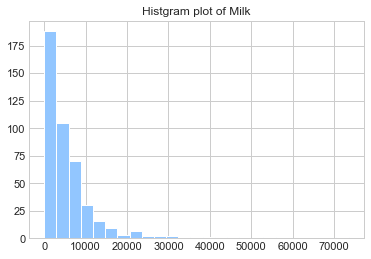

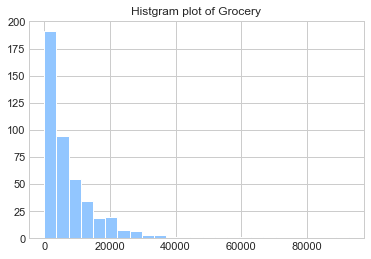

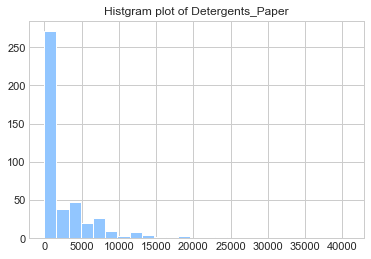

In [263]:
def hist_plot(column):
    fig = plt.figure()
    ax = fig.add_subplot(111) # stands for subplot(1,1,1)
    ax.hist(products[column], bins=25)
    plt.title('Histgram plot of ' + column)
    plt.show()

columns = ['Milk', 'Grocery', 'Detergents_Paper']
for c in columns:
    hist_plot(c)

Product Item Distrubtion

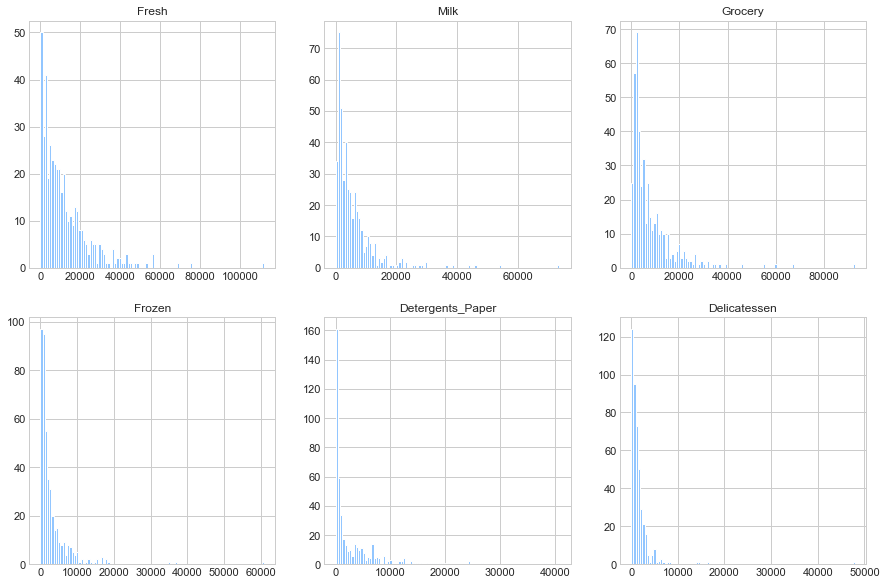

In [264]:
#Display the distribution accross all features
features = products.columns.values


fig = plt.figure(figsize=(15,10))
for i in range(len(features)):
    ax = fig.add_subplot(2,3,i+1)
    ax.set_title(features[i])
    ax.hist(products[features[i]], bins = 100)
plt.show()

In [265]:
from scipy.stats import iqr
print('IQR of Fresh item            ' + str(iqr(wholesale_customer_drop['Fresh'])))
print('IQR of Milk item             ' + str(iqr(wholesale_customer_drop['Milk'])))
print('IQR of Grocery item          ' + str(iqr(wholesale_customer_drop['Grocery'])))
print('IQR of Frozen item           ' + str(iqr(wholesale_customer_drop['Frozen'])))
print('IQR of Detergents_Paper item ' + str(iqr(wholesale_customer_drop['Detergents_Paper'])))
print('IQR of Delicatessen item     ' + str(iqr(wholesale_customer_drop['Delicatessen'])))

IQR of Fresh item            13806.0
IQR of Milk item             5657.25
IQR of Grocery item          8502.75
IQR of Frozen item           2812.0
IQR of Detergents_Paper item 3665.25
IQR of Delicatessen item     1412.0


In [266]:
print(wholesale_customer_drop.skew())

Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64


-------------------------------------------------------

A_--------------

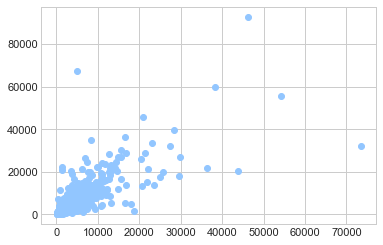

In [267]:
plt.scatter(x = wholesale_customer['Milk'], y = wholesale_customer['Grocery'])

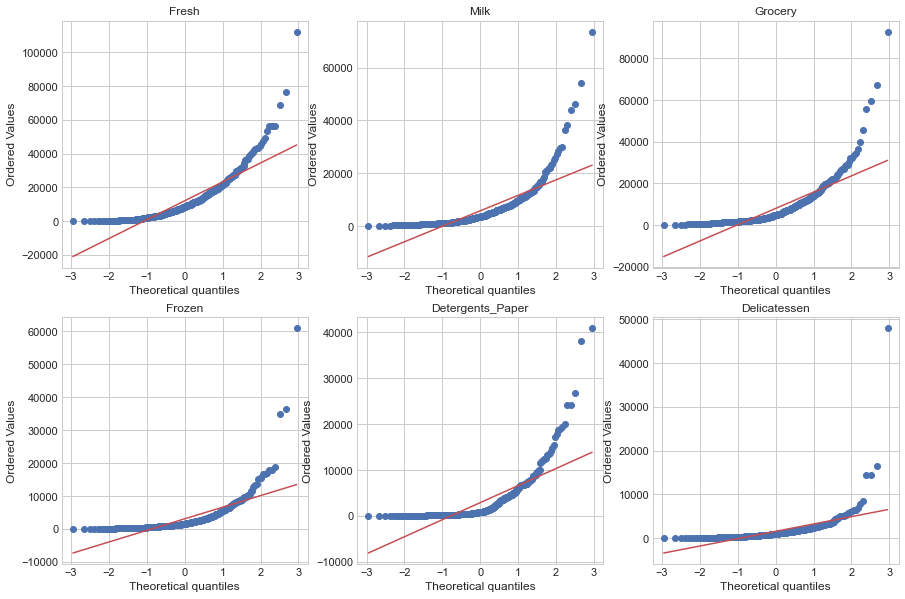

,Test Statistic,p-value
Fresh,0.781436,7.918286e-24
Milk,0.628334,9.762062e-30
Grocery,0.676231,3.906209e-28
Frozen,0.528297,1.291332e-32
Detergents_Paper,0.605482,1.914593e-30
Delicatessen,0.361068,1.753408e-36


In [268]:
from scipy.stats import boxcox, probplot, norm, shapiro

shapiro_test = {}
plt.figure(figsize=(15, 10))
for i in range(0,6):
    ax = plt.subplot(2,3,i+1)
    probplot(x = products[products.columns[i]], dist=norm, plot=ax)
    plt.title(products.columns[i])
    shapiro_test[products.columns[i]] = shapiro(products[products.columns[i]])
    
plt.show()

pd.DataFrame(shapiro_test, index=['Test Statistic', 'p-value']).transpose()

All the variable are statistically significant non normally distributed.

Let's try the Logarithmic Transformation:

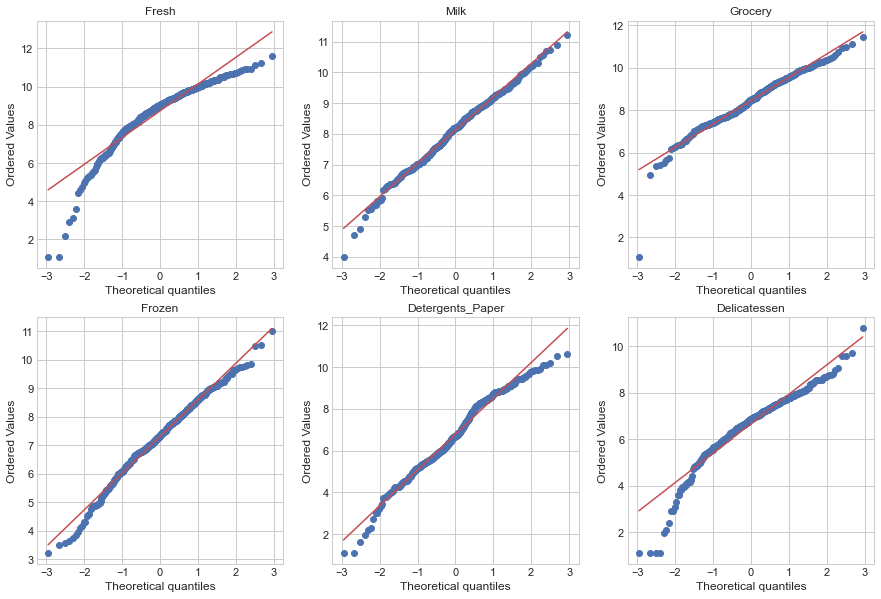

,Test Statistic,p-value
Fresh,0.781436,7.918286e-24
Milk,0.628334,9.762062e-30
Grocery,0.676231,3.906209e-28
Frozen,0.528297,1.291332e-32
Detergents_Paper,0.605482,1.914593e-30
Delicatessen,0.361068,1.753408e-36


In [269]:
products_log = np.log(products)

shapiro_test = {}

plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2,3,i+1)
    probplot(x = products_log[products_log.columns[i]], dist=norm, plot=ax)
    plt.title(products_log.columns[i])
    shapiro_test[products.columns[i]] = shapiro(products[products.columns[i]])
    
plt.show()

pd.DataFrame(shapiro_test, index=['Test Statistic', 'p-value']).transpose()

The Log-Transformation is also not satisfactorily. Let's try BoxCox transformation:

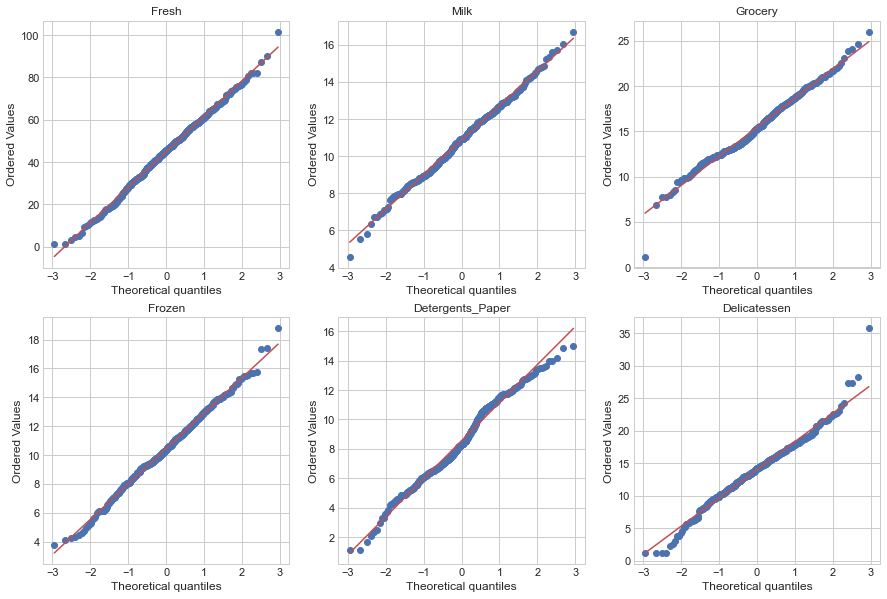

,Test Statistic,p-value
Fresh,0.997445,0.737682
Milk,0.996949,0.584299
Grocery,0.989161,0.002424
Frozen,0.997237,0.673424
Detergents_Paper,0.985208,0.000185
Delicatessen,0.981869,0.000026


In [270]:
from scipy.stats import boxcox

shapiro_test = {}
lambdas = {}

plt.figure(figsize=(15, 10))
plt.title('BoxCox Transformation')
for i in range(6):
    ax = plt.subplot(2,3,i+1)
    x, lbd = boxcox(products[products.columns[i]])
    probplot(x = x, dist=norm, plot=ax)
    plt.title(products.columns[i])
    shapiro_test[products.columns[i]] = shapiro(x)
    lambdas[products.columns[i]] = lbd
    
plt.show()

pd.DataFrame(shapiro_test, index=['Test Statistic', 'p-value']).transpose()

In [271]:
products.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Correlation Heat map of the data


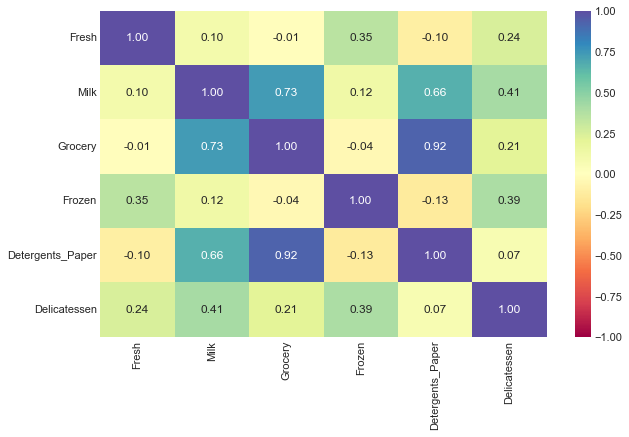

In [272]:
print('Correlation Heat map of the data')
plt.figure(figsize=(10,6))
sns.heatmap(products.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()

In [273]:
def scatterplot(i,j):
    sns.regplot(data=products_log,x=i,y=j)
    plt.show()

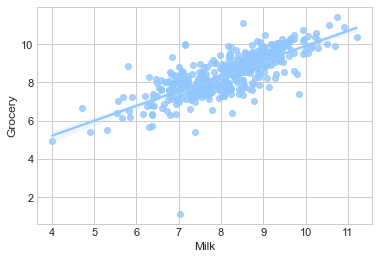

In [274]:
scatterplot(i='Milk',j='Grocery')

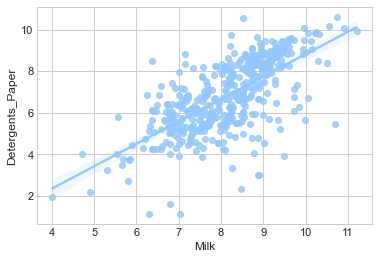

In [275]:
scatterplot(i='Milk',j='Detergents_Paper')

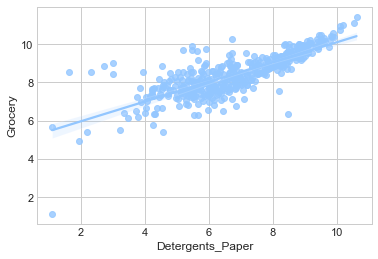

In [276]:
scatterplot(i='Detergents_Paper',j='Grocery')

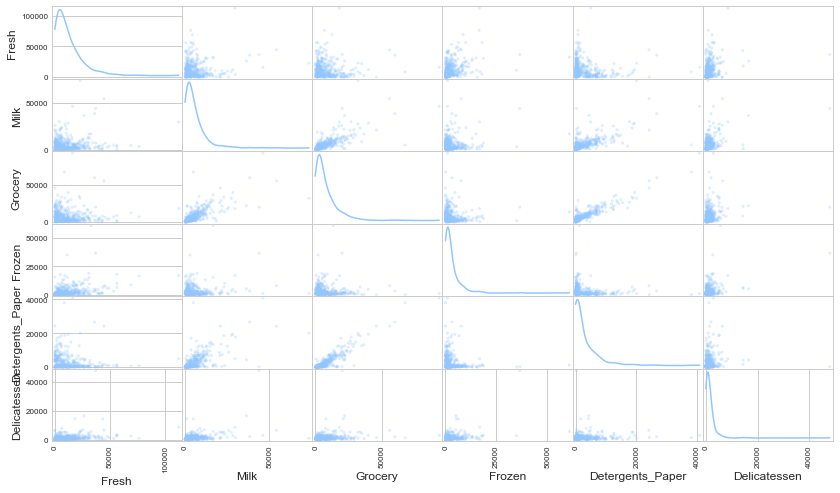

In [277]:
pd.plotting.scatter_matrix(products, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

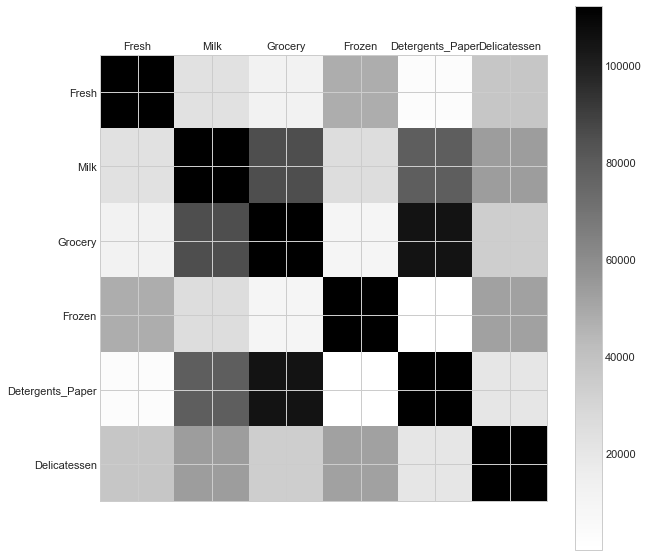

In [278]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);




plot_corr(products)

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

1. It can be noticed that the overall sales in Hotels is much morethan the sales in Retail. The distributor may consider Retail
channel as a target area for further expansion on growth.
2. Spend in Hotel needs to be increased in Milk, Grocery andDetergents_Paper.
3. Spend in Retail needs to be increased in Fresh, Frozen andDelicatessen.
4. The spending should be done carefully as Grocery items are alsovery inconsistent.
5. The annual spending in both channels by all the regions should bemanaged carefully especially in case of Fresh items because Freshitems have the highest standard deviation and are leastinconsistent. So, the spending on this item should be donecarefully.
6. The data is not normally distributed due to the presence of manyoutliers. This indicates that a large no of sales can be attributed tosome specific buyers.
7. They should focus on increasing the Total in Lisbon, Oportoregions and Retail Channel to balance the reduce risk while
increasing business.


# Problem 2 - (Download Data)

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
2.1. For this data, construct the following contingency tables (Keep Gender as row variable)








In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [280]:
import warnings
warnings.filterwarnings("ignore")

In [281]:
df=pd.read_csv("Survey-1.csv")

In [282]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [283]:
df.shape


(62, 14)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [285]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [286]:

df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


2.1.1. Gender and Major

In [287]:

pd.crosstab(df.Gender, df.Major)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


2.1.2. Gender and Grad Intention

In [288]:
pd.crosstab(df.Gender, df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17



2.1.3. Gender and Employment

In [289]:

pd.crosstab(df.Gender, df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


2.1.4. Gender and Computer

In [290]:
pd.crosstab(df.Gender, df['Computer'])


Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [291]:
No_of_male = (df['Gender'] =='Male').sum()
print(No_of_male)
No_of_female = (df['Gender'] =='Female').sum()
print(No_of_female)
Total_value =df['Gender'].value_counts().sum()
print(Total_value)

29
33
62


In [292]:
p_male = No_of_male/Total_value

print('The probability that a randomly selected CMSU student will be male',(p_male)*100)

The probability that a randomly selected CMSU student will be male 46.774193548387096


In [293]:
p_female= No_of_female/Total_value

print('The probability that a randomly selected CMSU student will be male',(p_female)*100)

The probability that a randomly selected CMSU student will be male 53.2258064516129


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [294]:
pd.crosstab(df['Gender'],df['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [295]:
# P(Major | male) = P(Major ∩ male)/ P(male)

In [296]:
print('Among Male candidates:')
print('Probability of Males opting for Accounting:',4/29)
print('Probability of Males opting for CIS:',1/29)
print('Probability of Males opting for Economics/Finance ',4/29)
print('Probability of Males opting for International Business:',2/29)
print('Probability of Males opting for Management:',6/29)
print('Probability of Males opting for Other :',4/29)
print('Probability of Males opting for Retailing/Marketing :',5/29)
print('Probability of Males opting for Undecided:',3/29)
print()

Among Male candidates:
Probability of Males opting for Accounting: 0.13793103448275862
Probability of Males opting for CIS: 0.034482758620689655
Probability of Males opting for Economics/Finance  0.13793103448275862
Probability of Males opting for International Business: 0.06896551724137931
Probability of Males opting for Management: 0.20689655172413793
Probability of Males opting for Other : 0.13793103448275862
Probability of Males opting for Retailing/Marketing : 0.1724137931034483
Probability of Males opting for Undecided: 0.10344827586206896



2.3.2 Find the conditional probability of different majors among the female students of CMSU

In [297]:
# P(Major | Female) = P(Major ∩ Female)/ P(Female)

In [298]:
print('Among Female candidates:')
print('Probability of Female opting for Accounting:',3/33)
print('Probability of Female opting for CIS:',3/33)
print('Probability of Female opting for Economics/Finance :',7/33)
print('Probability of Female opting for International Business:',4/33)
print('Probability of Female opting for Management:',4/33)
print('Probability of Female opting for Other :',3/33)
print('Probability of Female opting for Retailing/Marketing :',9/33)
print('Probability of Female opting for Undecided:',0/33)
print()

Among Female candidates:
Probability of Female opting for Accounting: 0.09090909090909091
Probability of Female opting for CIS: 0.09090909090909091
Probability of Female opting for Economics/Finance : 0.21212121212121213
Probability of Female opting for International Business: 0.12121212121212122
Probability of Female opting for Management: 0.12121212121212122
Probability of Female opting for Other : 0.09090909090909091
Probability of Female opting for Retailing/Marketing : 0.2727272727272727
Probability of Female opting for Undecided: 0.0



# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.


In [299]:

df['Grad Intention'].value_counts()

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64

In [324]:
df.groupby(['Gender', 'Grad Intention']).size()

Gender  Grad Intention
Female  No                 9
        Undecided         13
        Yes               11
Male    No                 3
        Undecided          9
        Yes               17
dtype: int64

In [325]:
pd.crosstab(df.Gender, df['Grad Intention'],margins = True,normalize='index')

Grad Intention,No,Undecided,Yes
Gender,,,
Female,0.272727,0.393939,0.333333
Male,0.103448,0.310345,0.586207
All,0.193548,0.354839,0.451613



2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [326]:
df['Computer'].value_counts()

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64

In [327]:
df.groupby(['Gender', 'Computer']).size()


Gender  Computer
Female  Desktop      2
        Laptop      29
        Tablet       2
Male    Desktop      3
        Laptop      26
dtype: int64

In [328]:

pd.crosstab(df.Gender, df['Computer'],margins = True,normalize='index')

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,0.060606,0.878788,0.060606
Male,0.103448,0.896552,0.000000
All,0.080645,0.887097,0.032258


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?



In [ ]:
df['Employment'].value_counts()

In [ ]:
pd.crosstab(df['Gender'],df['Employment'] )

In [ ]:
No_of_fulltime_emp = (df['Employment'] =='Full-Time').sum()
No_of_fulltime_emp

In [ ]:
No_male_fulltime_emp = ((df['Employment'] =='Full-Time') & (df['Gender'] =='Male')).sum()
No_male_fulltime_emp

In [ ]:

df.groupby(['Gender', 'Employment']).size()

In [ ]:
p_of_male_stu =No_of_male/Total_value
print(round((p_of_male_stu), 4)*100)
p_of_fulltime_emp =No_of_fulltime_emp/Total_value
print(round((p_of_fulltime_emp), 4)*100)
p_of_male_fulltime_emp = No_male_fulltime_emp/Total_value
print(round((p_of_male_fulltime_emp), 4)*100)

In [ ]:

p = p_of_male_stu+p_of_fulltime_emp-p_of_male_fulltime_emp
print(' The probability that a randomly chosen student is either a male or has full-time employment', p*100 ,'%')

# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in


In [ ]:
(df['Major'].value_counts())
(df.groupby(['Gender', 'Major']).size())
val_1 = (df['Gender']=='Female').sum()
val_2 = ((df['Gender']=='Female') & (df['Major'] == 'International Business')).sum()
val_3 = ((df['Gender']=='Female') & (df['Major'] == 'Management')).sum()
val_4 = val_2 + val_3
val_4

In [ ]:
pd.crosstab(df['Gender'],df['Major'] )

In [ ]:

print('Probability that given a female student is randomly chosen, she is majoring in international business or management',round((val_4/val_1)*100, 2), "%")

# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [329]:
df[df['Grad Intention'] == 'Undecided'].index
df_cont = df.drop(df[df['Grad Intention'] == 'Undecided'].index)
df_cont.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [330]:
pd.crosstab(df['Gender'] , df_cont['Grad Intention'] ,margins =True)

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


In [331]:
pd.crosstab(df['Gender'],df['Grad Intention'] )

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [332]:
pd.crosstab(df['Gender'] , df_cont['Grad Intention'] ,margins =True,normalize='index')

Grad Intention,No,Yes
Gender,,
Female,0.45,0.55
Male,0.15,0.85
All,0.30,0.70


In [333]:
 print('The probability that a randomly selected Student is Female',(20/40)*100)

The probability that a randomly selected Student is Female 50.0


In [334]:

val2 = ((df['Gender']=='Female') & (df_cont['Grad Intention'] == 'Yes')).sum()
print('The probability that a randomly selected student is female and intends to graduate',(val2/20)*100, '%' )
print('They are not independent events')

The probability that a randomly selected student is female and intends to graduate 55.00000000000001 %
They are not independent events



2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [335]:
No_of_stud_less = (df['GPA'] < 3).sum()
print(No_of_stud_less)
print(Total_value)

17
62


In [336]:
pd.crosstab(df['Gender'],df['GPA'] )

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [337]:
No_of_stud_less = (df['GPA'] < 3).sum()
p_of_stud_less =No_of_stud_less/Total_value
print('The probability that his/her GPA is less than 3 is', (p_of_stud_less)*100, '%')

The probability that his/her GPA is less than 3 is 27.419354838709676 %


2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [338]:
((df['Gender']=='Male') & (df['Salary'] >= 50)).sum()

14

In [339]:
pd.crosstab(df['Gender'],df['Salary'] )

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [340]:
pd.crosstab((df['Gender']=='Male'), (df['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.454545,0.545455
True,0.517241,0.482759


In [341]:
((df['Gender']=='Female') & (df['Salary'] >= 50)).sum()



18

In [342]:
pd.crosstab((df['Gender']=='Female'), (df['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.517241,0.482759
True,0.454545,0.545455


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

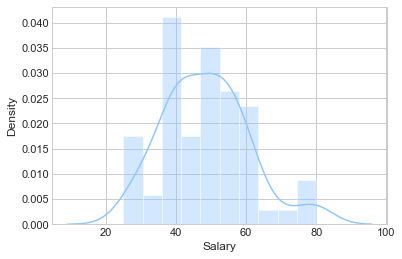

In [343]:
sns.distplot(df['Salary'], bins = 10, kde=True, rug= False);

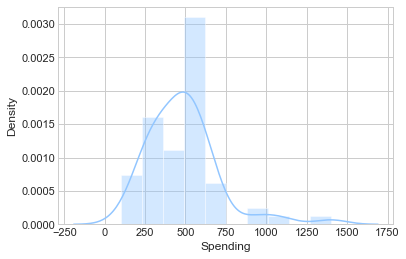

In [344]:
sns.distplot(df['Spending'], bins = 10, kde=True, rug= False);

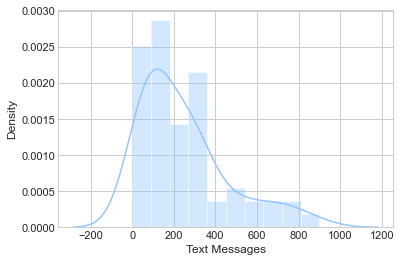

In [345]:
sns.distplot(df['Text Messages'], bins = 10, kde=True, rug= False);

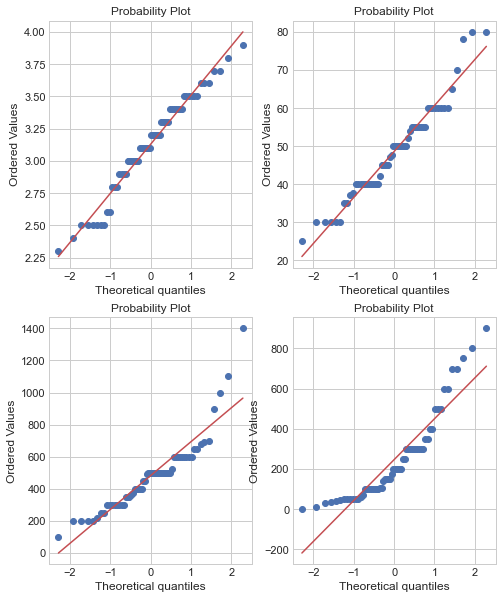

In [346]:
plt.figure(figsize=[8, 10])

plt.subplot(2, 2, 1)
stats.probplot(df['GPA'], plot=plt);


plt.subplot(2, 2, 2)
stats.probplot(df['Salary'], plot=plt);



plt.subplot(2, 2, 3)
stats.probplot(df['Spending'], plot=plt);



plt.subplot(2, 2, 4)
stats.probplot(df['Text Messages'], plot=plt);

plt.show()

skew value of GPA is -0.3146000894506981
skew value of Salary is 0.5347008436225946
skew value of Spending is 1.5859147414045331
skew value of Text Message is 1.2958079731054333


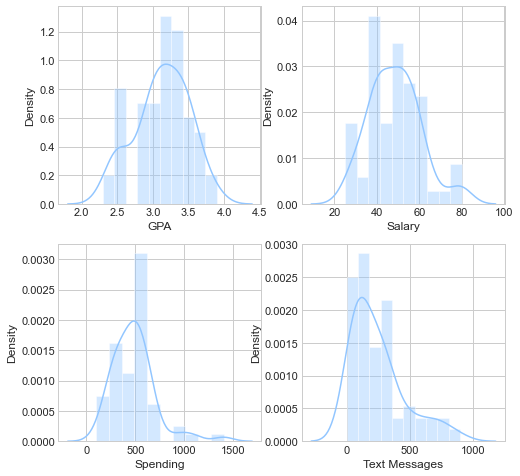

In [347]:

plt.figure(figsize=[8, 8])

plt.subplot(2, 2, 1)
sns.distplot(df['GPA'], bins = 10, kde=True, rug= False);
print('skew value of GPA is', df['GPA'].skew())

plt.subplot(2, 2, 2)
sns.distplot(df['Salary'], bins = 10, kde=True, rug= False);
print('skew value of Salary is', df['Salary'].skew())


plt.subplot(2, 2, 3)
sns.distplot(df['Spending'], bins = 10, kde=True, rug= False);
print('skew value of Spending is', df['Spending'].skew())


plt.subplot(2, 2, 4)
sns.distplot(df['Text Messages'], bins = 10, kde=True, rug= False);
print('skew value of Text Message is', df['Text Messages'].skew())

plt.show()

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.


Weimportedthe'A&B shingles'dataset in Python to analyze the data about theAsphalt Shingles.below is the detailed approach and Answer

In [348]:


import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os
import scipy.stats as stats

In [349]:
df=pd.read_csv("A+&+B+shingles (1).csv")

In [350]:
df.head(9)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25


In [351]:
#H0=u=0.35 pounds per 100 square feet
#H1=u<=0.35 pounds per 100 square feet

In [352]:
# Executing one sample t-test

In [353]:
from scipy.stats import ttest_1samp
t_statistic,p_value=ttest_1samp(df.A,.35)
t_statistic,p_value/2

(-1.4735046253382782, 0.07477633144907513)

One samplettest Sincepvalue>0.05,do not rejectH0.There is not enough evidence to conclude that the mean moisture content for SampleAshingles is no  less than 0.35 pounds per 100 squarefeet.pvalue=0.0748.If the population mean moisturecontent is infact no less than 0.35 pounds per 100square feet,the probability of observing a sample of 36shingles that will result in sample mean moisture content of0.3167 pounds per 100 square feet orless is.0748.

In [354]:
from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(df.B,.35,nan_policy='omit')
t_statistic,p_value/2

(-3.1003313069986995, 0.0020904774003191826)


One sample ttest Since pvalue<0.05,reject H0.There is enough evidence to conclude that the mean moisture contentforSample B shingles is not less
than0.35 pounds per 100squarefeet.p-value=0.0021.If the population mean moisture content is infact no less than0.35pounds per 100 square feet,the probability of observing a sample of 31 shingles that will resultin a sample mean moisture content of 0.2735 pounds per 100 square feet or less is.0021

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

We mention the Null hypothesis and Alternate hypothesis as below:
H0 : μ(A)= μ(B)
Ha : μ(A)!= μ(B)
Alpha = 0.05
As the Pvalue > 0.05 Alpha, we do not reject H0; we can say that
population mean for shingles A and B are equal Test Assumptions.
When running a two-sample t-test, the basic assumptions are that the
distributions of the two populations are normal, and that the variances
of the two distributions are the same.
Hence,

In [ ]:
from scipy.stats import ttest_ind
t_statistic,p_value=ttest_ind(df['A'],df['B'],equal_var=True,nan_policy='omit')
t_statistic,p_value

Two sample ttest
As the pvalue>α,do not reject H0;and we can say that population mean for shingles A and B are equalTest. Assumptions When running a
two-samplet-test,the basics assumptions are that the distributions of the two populations are normal and that the variances of the distributionsarethesame.If
those assumptions are not likely to be met,another testing procedure could be use.